In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_people = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀과제/df_people.csv') 

In [4]:
df_people =df_people.drop('Unnamed: 0',axis=1)

In [ ]:
df_people.isna().sum() 
# df_people.isna().mean() 


기준일ID              0
시간대구분              0
행정동코드              0
총생활인구수             0
남자0세부터9세생활인구수      0
남자10세부터14세생활인구수    0
남자15세부터19세생활인구수    0
남자20세부터24세생활인구수    0
남자25세부터29세생활인구수    0
남자30세부터34세생활인구수    0
남자35세부터39세생활인구수    0
남자40세부터44세생활인구수    0
남자45세부터49세생활인구수    0
남자50세부터54세생활인구수    0
남자55세부터59세생활인구수    0
남자60세부터64세생활인구수    0
남자65세부터69세생활인구수    0
남자70세이상생활인구수       0
여자0세부터9세생활인구수      0
여자10세부터14세생활인구수    0
여자15세부터19세생활인구수    0
여자20세부터24세생활인구수    0
여자25세부터29세생활인구수    0
여자30세부터34세생활인구수    0
여자35세부터39세생활인구수    0
여자40세부터44세생활인구수    0
여자45세부터49세생활인구수    0
여자50세부터54세생활인구수    0
여자55세부터59세생활인구수    0
여자60세부터64세생활인구수    0
여자65세부터69세생활인구수    0
여자70세이상생활인구수       0
dtype: int64

In [6]:
df_dong = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/팀과제/행정동코드_매핑정보_20200325.xlsx') 

In [7]:
df_dong

,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
0,H_SDNG_CD,H_DNG_CD,DO_NM,CT_NM,H_DNG_NM
1,1101053,11110530,서울,종로구,사직동
2,1101054,11110540,서울,종로구,삼청동
3,1101055,11110550,서울,종로구,부암동
4,1101056,11110560,서울,종로구,평창동
...,...,...,...,...,...
420,1125070,11740690,서울,강동구,둔촌1동
421,1125071,11740700,서울,강동구,둔촌2동
422,1125072,11740570,서울,강동구,암사1동
423,1125073,11740610,서울,강동구,천호2동


In [8]:
df_dong =df_dong.drop(0, axis=0)
df_dong = df_dong.reset_index(drop=True)

In [9]:
df_dong.head()

,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
0,1101053,11110530,서울,종로구,사직동
1,1101054,11110540,서울,종로구,삼청동
2,1101055,11110550,서울,종로구,부암동
3,1101056,11110560,서울,종로구,평창동
4,1101057,11110570,서울,종로구,무악동


In [10]:
df_dong['행정동코드'] = df_dong['행자부행정동코드'].astype(int)

In [11]:
df_dong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   통계청행정동코드  424 non-null    object
 1   행자부행정동코드  424 non-null    object
 2   시도명       424 non-null    object
 3   시군구명      424 non-null    object
 4   행정동명      424 non-null    object
 5   행정동코드     424 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 20.0+ KB


In [12]:
print(df_people['행정동코드'][1])
print(df_dong['행정동코드'][0])

11110530
11110530


In [13]:
df_people['행정동코드'][1] == df_dong['행정동코드'][0]

True

In [14]:
df_people['시군구명']=''
df_people['행정동명']=''

In [15]:
# for i in range(len(df_people)):
#   for j in range(len(df_dong)):
#     if( df_people['행정동코드'][i] == int(df_dong['행자부행정동코드'][j]) ):
#       df_people['시군구명'][i] = df_dong['시군구명'][j]
#       df_people['행정동명'][i] = df_dong['행정동명'][j]
#       break

In [16]:
# df_people

In [17]:
gugun = df_dong.loc[:,['행정동코드','시군구명']]

In [18]:
gugun.set_index('행정동코드',inplace=True)

In [19]:
gugun = gugun.to_dict()

In [20]:
gugun = {11110530: '종로구',  11110540: '종로구',  11110550: '종로구',  11110560: '종로구',  11110570: '종로구',  11110580: '종로구',  11110600: '종로구',  11110615: '종로구',
  11110630: '종로구',  11110640: '종로구',  11110670: '종로구',  11110680: '종로구',  11110690: '종로구',  11110700: '종로구',  11110710: '종로구',  11110515: '종로구',
  11110650: '종로구',  11140520: '중구',  11140540: '중구',  11140550: '중구',  11140570: '중구',  11140580: '중구',  11140590: '중구',  11140605: '중구',
  11140650: '중구',  11140670: '중구',  11140680: '중구',  11140615: '중구',  11140625: '중구',  11140635: '중구',  11140645: '중구',  11140665: '중구',
  11170510: '용산구',  11170520: '용산구',  11170530: '용산구',  11170570: '용산구',  11170580: '용산구',  11170590: '용산구',  11170630: '용산구',  11170640: '용산구',
  11170650: '용산구',  11170660: '용산구',  11170690: '용산구',  11170700: '용산구',  11170555: '용산구',  11170560: '용산구',  11170625: '용산구',  11170685: '용산구',
  11200520: '성동구',  11200540: '성동구',  11200550: '성동구',  11200560: '성동구',  11200570: '성동구',  11200580: '성동구',  11200590: '성동구',  11200620: '성동구',
  11200650: '성동구',  11200660: '성동구',  11200670: '성동구',  11200690: '성동구',  11200720: '성동구',  11200790: '성동구',  11200535: '성동구',  11200615: '성동구',
  11200645: '성동구',  11215710: '광진구',  11215730: '광진구',  11215740: '광진구',  11215750: '광진구',  11215760: '광진구',  11215770: '광진구',  11215780: '광진구',
  11215850: '광진구',  11215860: '광진구',  11215870: '광진구',  11215810: '광진구',  11215820: '광진구',  11215830: '광진구',  11215840: '광진구',  11215847: '광진구',
  11230710: '동대문구',  11230720: '동대문구',  11230730: '동대문구',  11230705: '동대문구',  11230536: '동대문구',  11230545: '동대문구',  11230560: '동대문구',  11230570: '동대문구',
  11230610: '동대문구',  11230650: '동대문구',  11230660: '동대문구',  11230740: '동대문구',  11230750: '동대문구',  11230600: '동대문구',  11260520: '중랑구',  11260540: '중랑구',
  11260550: '중랑구',  11260570: '중랑구',  11260580: '중랑구',  11260590: '중랑구',  11260600: '중랑구',  11260610: '중랑구',  11260620: '중랑구',  11260630: '중랑구',
  11260660: '중랑구',  11260680: '중랑구',  11260690: '중랑구',  11260565: '중랑구',  11260575: '중랑구',  11260655: '중랑구',  11290580: '성북구',  11290590: '성북구',
  11290600: '성북구',  11290610: '성북구',  11290620: '성북구',  11290630: '성북구',  11290640: '성북구',  11290650: '성북구',  11290660: '성북구',  11290685: '성북구',
  11290715: '성북구',  11290725: '성북구',  11290760: '성북구',  11290770: '성북구',  11290780: '성북구',  11290525: '성북구',  11290555: '성북구',  11290575: '성북구',
  11290705: '성북구',  11290810: '성북구',  11305590: '강북구',  11305600: '강북구',  11305606: '강북구',  11305610: '강북구',  11305620: '강북구',  11305630: '강북구',
  11305534: '강북구',  11305535: '강북구',  11305545: '강북구',  11305555: '강북구',  11305575: '강북구',  11305645: '강북구',  11305660: '강북구',  11320660: '도봉구',
  11320670: '도봉구',  11320680: '도봉구',  11320681: '도봉구',  11320690: '도봉구',  11320700: '도봉구',  11320710: '도봉구',  11320511: '도봉구',  11320512: '도봉구',
  11320513: '도봉구',  11320514: '도봉구',  11320515: '도봉구',  11320521: '도봉구',  11320522: '도봉구',  11350560: '노원구',  11350570: '노원구',  11350580: '노원구',
  11350600: '노원구',  11350611: '노원구',  11350612: '노원구',  11350619: '노원구',  11350621: '노원구',  11350624: '노원구',  11350630: '노원구',  11350640: '노원구',
  11350670: '노원구',  11350700: '노원구',  11350710: '노원구',  11350720: '노원구',  11350665: '노원구',  11350695: '노원구',  11350625: '노원구',  11350595: '노원구',
  11380510: '은평구',  11380520: '은평구',  11380551: '은평구',  11380552: '은평구',  11380560: '은평구',  11380570: '은평구',  11380580: '은평구',  11380590: '은평구',
  11380631: '은평구',  11380632: '은평구',  11380640: '은평구',  11380650: '은평구',  11380690: '은평구',  11380530: '은평구',  11380600: '은평구',  11380625: '은평구',
  11410520: '서대문구',  11410620: '서대문구',  11410640: '서대문구',  11410655: '서대문구',  11410660: '서대문구',  11410685: '서대문구',  11410690: '서대문구',  11410700: '서대문구',
  11410710: '서대문구',  11410720: '서대문구',  11410565: '서대문구',  11410555: '서대문구',  11410585: '서대문구',  11410615: '서대문구',  11440590: '마포구',  11440600: '마포구',
  11440610: '마포구',  11440630: '마포구',  11440660: '마포구',  11440680: '마포구',  11440690: '마포구',  11440700: '마포구',  11440710: '마포구',  11440720: '마포구',
  11440730: '마포구',  11440740: '마포구',  11440585: '마포구',  11440655: '마포구',  11440565: '마포구',  11440555: '마포구',  11470510: '양천구',  11470520: '양천구',
  11470530: '양천구',  11470540: '양천구',  11470560: '양천구',  11470570: '양천구',  11470580: '양천구',  11470590: '양천구',  11470600: '양천구',  11470610: '양천구',
  11470611: '양천구',  11470620: '양천구',  11470630: '양천구',  11470640: '양천구',  11470670: '양천구',  11470680: '양천구',  11470550: '양천구',  11470650: '양천구',
  11500510: '강서구',  11500520: '강서구',  11500530: '강서구',  11500535: '강서구',  11500590: '강서구',  11500550: '강서구',  11500560: '강서구',  11500570: '강서구',
  11500591: '강서구',  11500593: '강서구',  11500603: '강서구',  11500604: '강서구',  11500605: '강서구',  11500611: '강서구',  11500620: '강서구',  11500630: '강서구',
  11500640: '강서구',  11500641: '강서구',  11500540: '강서구',  11500615: '강서구',  11530510: '구로구',  11530520: '구로구',  11530540: '구로구',  11530550: '구로구',
  11530560: '구로구',  11530720: '구로구',  11530730: '구로구',  11530750: '구로구',  11530760: '구로구',  11530770: '구로구',  11530780: '구로구',  11530790: '구로구',
  11530595: '구로구',  11530530: '구로구',  11530740: '구로구',  11545510: '금천구',  11545610: '금천구',  11545620: '금천구',  11545630: '금천구',  11545640: '금천구',
  11545670: '금천구',  11545680: '금천구',  11545690: '금천구',  11545700: '금천구',  11545710: '금천구',  11560540: '영등포구',  11560550: '영등포구',  11560560: '영등포구',
  11560610: '영등포구',  11560620: '영등포구',  11560630: '영등포구',  11560650: '영등포구',  11560660: '영등포구',  11560670: '영등포구',  11560680: '영등포구',  11560690: '영등포구',
  11560700: '영등포구',  11560710: '영등포구',  11560720: '영등포구',  11560515: '영등포구',  11560535: '영등포구',  11560585: '영등포구',  11560605: '영등포구',  11590520: '동작구',
  11590530: '동작구',  11590540: '동작구',  11590550: '동작구',  11590560: '동작구',  11590620: '동작구',  11590640: '동작구',  11590650: '동작구',  11590651: '동작구',
  11590660: '동작구',  11590670: '동작구',  11590680: '동작구',  11590605: '동작구',  11590510: '동작구',  11590630: '동작구',  11620525: '관악구',  11620545: '관악구',
  11620575: '관악구',  11620585: '관악구',  11620615: '관악구',  11620625: '관악구',  11620630: '관악구',  11620645: '관악구',  11620655: '관악구',  11620665: '관악구',
  11620685: '관악구',  11620695: '관악구',  11620715: '관악구',  11620725: '관악구',  11620735: '관악구',  11620605: '관악구',  11620565: '관악구',  11620595: '관악구',
  11620775: '관악구',  11620745: '관악구',  11620765: '관악구',  11650510: '서초구',  11650520: '서초구',  11650530: '서초구',  11650531: '서초구',  11650540: '서초구',
  11650550: '서초구',  11650560: '서초구',  11650570: '서초구',  11650580: '서초구',  11650581: '서초구',  11650590: '서초구',  11650600: '서초구',  11650610: '서초구',
  11650620: '서초구',  11650621: '서초구',  11650651: '서초구',  11650652: '서초구',  11650660: '서초구',  11680510: '강남구',  11680521: '강남구',  11680531: '강남구',
  11680580: '강남구',  11680590: '강남구',  11680600: '강남구',  11680630: '강남구',  11680640: '강남구',  11680650: '강남구',  11680655: '강남구',  11680656: '강남구',
  11680660: '강남구',  11680690: '강남구',  11680720: '강남구',  11680730: '강남구',  11680740: '강남구',  11680750: '강남구',  11680700: '강남구',  11680545: '강남구',
  11680565: '강남구',  11680610: '강남구',  11680670: '강남구',  11710510: '송파구',  11710520: '송파구',  11710531: '송파구',  11710532: '송파구',  11710540: '송파구',
  11710550: '송파구',  11710561: '송파구',  11710562: '송파구',  11710566: '송파구',  11710570: '송파구',  11710580: '송파구',  11710590: '송파구',  11710600: '송파구',
  11710610: '송파구',  11710620: '송파구',  11710631: '송파구',  11710632: '송파구',  11710641: '송파구',  11710642: '송파구',  11710650: '송파구',  11710690: '송파구',
  11710710: '송파구',  11710720: '송파구',  11710670: '송파구',  11710680: '송파구',  11710646: '송파구',  11710647: '송파구',  11740515: '강동구',  11740520: '강동구',
  11740530: '강동구',  11740540: '강동구',  11740550: '강동구',  11740560: '강동구',  11740580: '강동구',  11740590: '강동구',  11740600: '강동구',  11740620: '강동구',
  11740640: '강동구',  11740650: '강동구',  11740660: '강동구',  11740690: '강동구',  11740700: '강동구',  11740570: '강동구',  11740610: '강동구',  11740685: '강동구'}

In [21]:
df_people['행정동코드'].map(gugun)

0           종로구
1           종로구
2           종로구
3           종로구
4           종로구
           ... 
7428475     강동구
7428476     동작구
7428477     양천구
7428478     송파구
7428479    서대문구
Name: 행정동코드, Length: 7428480, dtype: object

In [22]:
df_people['시군구명']=df_people['행정동코드'].map(gugun)

In [23]:
dong = df_dong.loc[:,['행정동코드','행정동명']]
dong.set_index('행정동코드',inplace=True)
dong = dong.to_dict()
dong =  {11110530: '사직동',  11110540: '삼청동',  11110550: '부암동',  11110560: '평창동',
  11110570: '무악동',  11110580: '교남동',  11110600: '가회동',  11110615: '종로1.2.3.4가동',
  11110630: '종로5.6가동',  11110640: '이화동',  11110670: '창신1동',  11110680: '창신2동',
  11110690: '창신3동',  11110700: '숭인1동',  11110710: '숭인2동',  11110515: '청운효자동',
  11110650: '혜화동',  11140520: '소공동',  11140540: '회현동',  11140550: '명동',
  11140570: '필동',  11140580: '장충동',  11140590: '광희동',  11140605: '을지로동',
  11140650: '신당5동',  11140670: '황학동',  11140680: '중림동',  11140615: '신당동',
  11140625: '다산동',  11140635: '약수동',  11140645: '청구동',  11140665: '동화동',
  11170510: '후암동',  11170520: '용산2가동',  11170530: '남영동',  11170570: '원효로2동',
  11170580: '효창동',  11170590: '용문동',  11170630: '이촌1동',  11170640: '이촌2동',
  11170650: '이태원1동',  11170660: '이태원2동',  11170690: '서빙고동',  11170700: '보광동',
  11170555: '청파동',  11170560: '원효로1동',  11170625: '한강로동',  11170685: '한남동',
  11200520: '왕십리2동',  11200540: '마장동',  11200550: '사근동',  11200560: '행당1동',  11200570: '행당2동',  11200580: '응봉동',
  11200590: '금호1가동',  11200620: '금호4가동',  11200650: '성수1가1동',  11200660: '성수1가2동',
  11200670: '성수2가1동',  11200690: '성수2가3동',  11200720: '송정동',  11200790: '용답동',
  11200535: '왕십리도선동',  11200615: '금호2.3가동',  11200645: '옥수동',  11215710: '화양동',
  11215730: '군자동',  11215740: '중곡1동',  11215750: '중곡2동',  11215760: '중곡3동',
  11215770: '중곡4동',  11215780: '능동',  11215850: '구의1동',  11215860: '구의2동',
  11215870: '구의3동',  11215810: '광장동',  11215820: '자양1동',  11215830: '자양2동',
  11215840: '자양3동',  11215847: '자양4동',  11230710: '회기동',  11230720: '휘경1동',
  11230730: '휘경2동',  11230705: '청량리동',  11230536: '용신동',  11230545: '제기동',
  11230560: '전농1동',  11230570: '전농2동',  11230610: '답십리2동',  11230650: '장안1동',  11230660: '장안2동',  11230740: '이문1동',
  11230750: '이문2동',  11230600: '답십리1동',  11260520: '면목2동',  11260540: '면목4동',
  11260550: '면목5동',  11260570: '면목7동',  11260580: '상봉1동',  11260590: '상봉2동',
  11260600: '중화1동',  11260610: '중화2동',  11260620: '묵1동',  11260630: '묵2동',  11260660: '망우3동',  11260680: '신내1동',
  11260690: '신내2동',  11260565: '면목본동',  11260575: '면목3.8동',  11260655: '망우본동',
  11290580: '돈암1동',  11290590: '돈암2동',  11290600: '안암동',  11290610: '보문동',  11290620: '정릉1동',  11290630: '정릉2동',
  11290640: '정릉3동', 11290650: '정릉4동',  11290660: '길음1동',  11290685: '길음2동',  11290715: '월곡1동',  11290725: '월곡2동',
  11290760: '장위1동',  11290770: '장위2동',  11290780: '장위3동',  11290525: '성북동',  11290555: '삼선동',  11290575: '동선동',
  11290705: '종암동',  11290810: '석관동',  11305590: '번1동',  11305600: '번2동',  11305606: '번3동',  11305610: '수유1동',
  11305620: '수유2동',  11305630: '수유3동',  11305534: '삼양동',  11305535: '미아동',  11305545: '송중동',  11305555: '송천동',
  11305575: '삼각산동',  11305645: '우이동',  11305660: '인수동',  11320660: '쌍문1동',  11320670: '쌍문2동',  11320680: '쌍문3동',
  11320681: '쌍문4동',  11320690: '방학1동',  11320700: '방학2동',  11320710: '방학3동',  11320511: '창1동',  11320512: '창2동',
  11320513: '창3동',  11320514: '창4동',  11320515: '창5동',  11320521: '도봉1동',
  11320522: '도봉2동',  11350560: '월계1동',  11350570: '월계2동',  11350580: '월계3동',  11350600: '공릉2동',  11350611: '하계1동',
  11350612: '하계2동',  11350619: '중계본동',  11350621: '중계1동',  11350624: '중계4동',
  11350630: '상계1동',  11350640: '상계2동',  11350670: '상계5동',  11350700: '상계8동',
  11350710: '상계9동',  11350720: '상계10동',  11350665: '상계3.4동',  11350695: '상계6.7동',  11350625: '중계2.3동',  11350595: '공릉1동',
  11380510: '녹번동',  11380520: '불광1동',  11380551: '갈현1동',  11380552: '갈현2동',  11380560: '구산동',  11380570: '대조동',
  11380580: '응암1동',  11380590: '응암2동',  11380631: '신사1동',  11380632: '신사2동',  11380640: '증산동',  11380650: '수색동',  11380690: '진관동',  11380530: '불광2동',
  11380600: '응암3동',  11380625: '역촌동',  11410520: '천연동',  11410620: '홍제1동',  11410640: '홍제3동',  11410655: '홍제2동',  11410660: '홍은1동',  11410685: '홍은2동',
  11410690: '남가좌1동',  11410700: '남가좌2동',  11410710: '북가좌1동',  11410720: '북가좌2동',
  11410565: '충현동',  11410555: '북아현동',  11410585: '신촌동',  11410615: '연희동',
  11440590: '용강동',  11440600: '대흥동',  11440610: '염리동',  11440630: '신수동',
  11440660: '서교동',  11440680: '합정동',  11440690: '망원1동',  11440700: '망원2동',
  11440710: '연남동',  11440720: '성산1동',  11440730: '성산2동',  11440740: '상암동',  11440585: '도화동',  11440655: '서강동',
  11440565: '공덕동',  11440555: '아현동',  11470510: '목1동',  11470520: '목2동',
  11470530: '목3동',  11470540: '목4동',  11470560: '신월1동',  11470570: '신월2동',
  11470580: '신월3동',  11470590: '신월4동',  11470600: '신월5동',  11470610: '신월6동',
  11470611: '신월7동',  11470620: '신정1동',  11470630: '신정2동',  11470640: '신정3동',  11470670: '신정6동',  11470680: '신정7동',
  11470550: '목5동',  11470650: '신정4동',  11500510: '염창동',  11500520: '등촌1동',  11500530: '등촌2동',  11500535: '등촌3동',  11500590: '화곡본동',  11500550: '화곡2동',
  11500560: '화곡3동',  11500570: '화곡4동',  11500591: '화곡6동',  11500593: '화곡8동',  11500603: '가양1동',  11500604: '가양2동',
  11500605: '가양3동',  11500611: '발산1동',  11500620: '공항동',  11500630: '방화1동',
  11500640: '방화2동',  11500641: '방화3동',  11500540: '화곡1동',  11500615: '우장산동',
  11530510: '신도림동',  11530520: '구로1동',  11530540: '구로3동',  11530550: '구로4동',  11530560: '구로5동',  11530720: '고척1동',
  11530730: '고척2동',  11530750: '개봉2동',  11530760: '개봉3동',  11530770: '오류1동',  11530780: '오류2동',  11530790: '수궁동',
  11530595: '가리봉동',  11530530: '구로2동',  11530740: '개봉1동',  11545510: '가산동',  11545610: '독산1동',  11545620: '독산2동',
  11545630: '독산3동',  11545640: '독산4동',  11545670: '시흥1동',  11545680: '시흥2동',
  11545690: '시흥3동',  11545700: '시흥4동',  11545710: '시흥5동',  11560540: '여의동',
  11560550: '당산1동',  11560560: '당산2동',  11560610: '양평1동',  11560620: '양평2동',  11560630: '신길1동',  11560650: '신길3동',
  11560660: '신길4동',  11560670: '신길5동',  11560680: '신길6동',  11560690: '신길7동',
  11560700: '대림1동',  11560710: '대림2동',  11560720: '대림3동',  11560515: '영등포본동',
  11560535: '영등포동',  11560585: '도림동',  11560605: '문래동',  11590520: '노량진2동',  11590530: '상도1동',  11590540: '상도2동',
  11590550: '상도3동',  11590560: '상도4동',  11590620: '사당1동',  11590640: '사당3동',  11590650: '사당4동',  11590651: '사당5동',
  11590660: '대방동',  11590670: '신대방1동',  11590680: '신대방2동',  11590605: '흑석동',  11590510: '노량진1동',  11590630: '사당2동',
  11620525: '보라매동',  11620545: '청림동',  11620575: '행운동',  11620585: '낙성대동',  11620615: '중앙동',  11620625: '인헌동',
  11620630: '남현동',  11620645: '서원동',  11620655: '신원동',  11620665: '서림동',  11620685: '신사동',  11620695: '신림동',
  11620715: '난향동',  11620725: '조원동',  11620735: '대학동',  11620605: '은천동',  11620565: '성현동',  11620595: '청룡동',
  11620775: '난곡동',  11620745: '삼성동',  11620765: '미성동',  11650510: '서초1동',
  11650520: '서초2동',  11650530: '서초3동',  11650531: '서초4동',  11650540: '잠원동',
  11650550: '반포본동',  11650560: '반포1동',  11650570: '반포2동',  11650580: '반포3동',  11650581: '반포4동',  11650590: '방배본동',
  11650600: '방배1동',  11650610: '방배2동',  11650620: '방배3동',  11650621: '방배4동',
  11650651: '양재1동',  11650652: '양재2동',  11650660: '내곡동',  11680510: '신사동',
  11680521: '논현1동',  11680531: '논현2동',  11680580: '삼성1동',  11680590: '삼성2동',  11680600: '대치1동',  11680630: '대치4동',
  11680640: '역삼1동',  11680650: '역삼2동',  11680655: '도곡1동',  11680656: '도곡2동',  11680660: '개포1동',  11680690: '개포4동',
  11680720: '일원본동',  11680730: '일원1동',  11680740: '일원2동',  11680750: '수서동',  11680700: '세곡동',  11680545: '압구정동',
  11680565: '청담동',  11680610: '대치2동',  11680670: '개포2동',  11710510: '풍납1동',  11710520: '풍납2동',  11710531: '거여1동',
  11710532: '거여2동',  11710540: '마천1동',  11710550: '마천2동',  11710561: '방이1동',  11710562: '방이2동',  11710566: '오륜동',
  11710570: '오금동',  11710580: '송파1동',  11710590: '송파2동',  11710600: '석촌동',  11710610: '삼전동',  11710620: '가락본동',
  11710631: '가락1동',  11710632: '가락2동',  11710641: '문정1동',  11710642: '문정2동',
  11710650: '잠실본동',  11710690: '잠실4동',  11710710: '잠실6동',  11710720: '잠실7동',
  11710670: '잠실2동',  11710680: '잠실3동',  11710646: '장지동',  11710647: '위례동',  11740515: '강일동',  11740520: '상일동',
  11740530: '명일1동',  11740540: '명일2동',  11740550: '고덕1동',  11740560: '고덕2동',  11740580: '암사2동',  11740590: '암사3동',
  11740600: '천호1동',  11740620: '천호3동',  11740640: '성내1동',  11740650: '성내2동',  11740660: '성내3동',  11740690: '둔촌1동',
  11740700: '둔촌2동',  11740570: '암사1동',  11740610: '천호2동',  11740685: '길동'}

In [24]:
df_people['행정동명']=df_people['행정동코드'].map(dong)

In [25]:
df_people.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,시군구명,행정동명
0,20210101,0,11110515,14473.8890,504.7535,321.6298,474.2765,624.4867,507.3616,405.9607,...,534.8354,673.7167,746.3401,609.6886,590.1671,422.7630,339.8220,1138.9208,종로구,청운효자동
1,20210101,0,11110530,13299.5313,364.9421,162.1967,254.0620,318.9359,449.9919,419.8851,...,667.1788,565.2750,603.2522,522.3540,543.4003,447.2674,363.1686,1138.6352,종로구,사직동
2,20210101,0,11110550,15518.3772,418.3329,324.3693,380.5245,529.5754,470.6277,415.8823,...,621.1825,636.9613,840.1881,692.5841,693.3884,630.9412,421.9502,1456.3029,종로구,부암동
3,20210101,0,11110600,5108.9481,122.7939,86.6778,90.4754,203.9829,137.2541,124.3374,...,183.2139,268.8835,268.7073,247.4089,227.3631,163.6567,135.4872,406.3143,종로구,가회동
4,20210101,0,11110700,7907.7246,224.1087,106.2126,153.8756,194.7256,272.8423,315.6010,...,309.0617,316.6311,371.2800,370.3215,377.7498,258.4794,213.1911,532.8069,종로구,숭인1동


In [26]:
df_people.columns

Index(['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수',
       '시군구명', '행정동명'],
      dtype='object')

In [27]:
# '남성비율', '여성비율'
#  '0~10세 실시간 인구비율', '10대 실시간 인구비율', '20대 실시간 인구비율', '30대 실시간 인구비율',
# '40대 실시간 인구비율', '50대 실시간 인구비율', '60대 실시간 인구비율', '70대 실시간 인구비율'
df_people['남성비율'] = df_people['남자0세부터9세생활인구수']+ df_people['남자10세부터14세생활인구수']+df_people['남자15세부터19세생활인구수']+ df_people['남자20세부터24세생활인구수']+ df_people['남자25세부터29세생활인구수']+ df_people['남자30세부터34세생활인구수']+ df_people['남자35세부터39세생활인구수']+ df_people['남자40세부터44세생활인구수']+ df_people['남자45세부터49세생활인구수']+ df_people['남자50세부터54세생활인구수']+ df_people['남자55세부터59세생활인구수']+ df_people['남자60세부터64세생활인구수']+ df_people['남자65세부터69세생활인구수']+ df_people['남자70세이상생활인구수']/ df_people['총생활인구수']
df_people['여성비율'] = df_people['여자0세부터9세생활인구수']+ df_people['여자10세부터14세생활인구수']+df_people['여자15세부터19세생활인구수']+ df_people['여자20세부터24세생활인구수']+ df_people['여자25세부터29세생활인구수']+ df_people['여자30세부터34세생활인구수']+ df_people['여자35세부터39세생활인구수']+ df_people['여자40세부터44세생활인구수']+ df_people['여자45세부터49세생활인구수']+ df_people['여자50세부터54세생활인구수']+ df_people['여자55세부터59세생활인구수']+ df_people['여자60세부터64세생활인구수']+ df_people['여자65세부터69세생활인구수']+ df_people['여자70세이상생활인구수']/ df_people['총생활인구수']
df_people['0~10세 실시간 인구비율'] =(df_people['남자0세부터9세생활인구수']+df_people['여자0세부터9세생활인구수'] )/ df_people['총생활인구수']
df_people['10대 실시간 인구비율'] =(df_people['남자10세부터14세생활인구수']+df_people['남자15세부터19세생활인구수']+df_people['여자10세부터14세생활인구수']+df_people['여자15세부터19세생활인구수'] )/ df_people['총생활인구수']
df_people['20대 실시간 인구비율'] =(df_people['남자20세부터24세생활인구수']+df_people['남자25세부터29세생활인구수']+df_people['여자20세부터24세생활인구수']+df_people['여자25세부터29세생활인구수'] )/ df_people['총생활인구수']
df_people['30대 실시간 인구비율'] =(df_people['남자30세부터34세생활인구수']+df_people['남자35세부터39세생활인구수']+df_people['여자30세부터34세생활인구수']+df_people['여자35세부터39세생활인구수'] )/ df_people['총생활인구수']
df_people['40대 실시간 인구비율'] =(df_people['남자40세부터44세생활인구수']+df_people['남자45세부터49세생활인구수']+df_people['여자40세부터44세생활인구수']+df_people['여자45세부터49세생활인구수'] )/ df_people['총생활인구수']
df_people['50대 실시간 인구비율'] =(df_people['남자50세부터54세생활인구수']+df_people['남자55세부터59세생활인구수']+df_people['여자50세부터54세생활인구수']+df_people['여자55세부터59세생활인구수'] )/ df_people['총생활인구수']
df_people['60대 실시간 인구비율'] =(df_people['남자60세부터64세생활인구수']+df_people['남자65세부터69세생활인구수']+df_people['여자60세부터64세생활인구수']+df_people['여자65세부터69세생활인구수'] )/ df_people['총생활인구수']
df_people['70대 실시간 인구비율'] =(df_people['남자70세이상생활인구수']+df_people['여자70세이상생활인구수'] )/ df_people['총생활인구수']


In [28]:
df_people.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,남성비율,여성비율,0~10세 실시간 인구비율,10대 실시간 인구비율,20대 실시간 인구비율,30대 실시간 인구비율,40대 실시간 인구비율,50대 실시간 인구비율,60대 실시간 인구비율,70대 실시간 인구비율
0,20210101,0,11110515,14473.8890,504.7535,321.6298,474.2765,624.4867,507.3616,405.9607,...,6254.347853,6422.868388,0.070951,0.099115,0.139359,0.135329,0.186085,0.150571,0.094451,0.124140
1,20210101,0,11110530,13299.5313,364.9421,162.1967,254.0620,318.9359,449.9919,419.8851,...,5512.620232,5877.958215,0.056354,0.067062,0.115613,0.170216,0.176283,0.155219,0.115707,0.143546
2,20210101,0,11110550,15518.3772,418.3329,324.3693,380.5245,529.5754,470.6277,415.8823,...,6307.714402,6928.896244,0.051287,0.089195,0.121590,0.124943,0.178936,0.163464,0.123539,0.147046
3,20210101,0,11110600,5108.9481,122.7939,86.6778,90.4754,203.9829,137.2541,124.3374,...,2095.932518,2369.679330,0.059081,0.082559,0.119849,0.131252,0.200770,0.173183,0.107358,0.125948
4,20210101,0,11110700,7907.7246,224.1087,106.2126,153.8756,194.7256,272.8423,315.6010,...,3467.496647,3498.338778,0.054361,0.064020,0.128735,0.159906,0.165700,0.185685,0.122467,0.119125


In [29]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7428480 entries, 0 to 7428479
Data columns (total 44 columns):
 #   Column           Dtype  
---  ------           -----  
 0   기준일ID            int64  
 1   시간대구분            int64  
 2   행정동코드            int64  
 3   총생활인구수           float64
 4   남자0세부터9세생활인구수    float64
 5   남자10세부터14세생활인구수  float64
 6   남자15세부터19세생활인구수  float64
 7   남자20세부터24세생활인구수  float64
 8   남자25세부터29세생활인구수  float64
 9   남자30세부터34세생활인구수  float64
 10  남자35세부터39세생활인구수  float64
 11  남자40세부터44세생활인구수  float64
 12  남자45세부터49세생활인구수  float64
 13  남자50세부터54세생활인구수  float64
 14  남자55세부터59세생활인구수  float64
 15  남자60세부터64세생활인구수  float64
 16  남자65세부터69세생활인구수  float64
 17  남자70세이상생활인구수     float64
 18  여자0세부터9세생활인구수    float64
 19  여자10세부터14세생활인구수  float64
 20  여자15세부터19세생활인구수  float64
 21  여자20세부터24세생활인구수  float64
 22  여자25세부터29세생활인구수  float64
 23  여자30세부터34세생활인구수  float64
 24  여자35세부터39세생활인구수  float64
 25  여자40세부터44세생활인구수  float64
 26  여자45세부터49세생활인구수  float64
 27  여자50세부터54세생활

In [30]:
df_people.columns

Index(['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수',
       '시군구명', '행정동명', '남성비율', '여성비율', '0~10세 실시간 인구비율', '10대 실시간 인구비율',
       '20대 실시간 인구비율', '30대 실시간 인구비율', '40대 실시간 인구비율', '50대 실시간 인구비율',
       '60대 실시간 인구비율', '70대 실시간 인구비율'],
      dtype='object')

In [31]:
df_people['date'] = pd.to_datetime(df_people['기준일ID'],format='%Y%m%d', errors='ignore')

In [32]:
df_people.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여성비율,0~10세 실시간 인구비율,10대 실시간 인구비율,20대 실시간 인구비율,30대 실시간 인구비율,40대 실시간 인구비율,50대 실시간 인구비율,60대 실시간 인구비율,70대 실시간 인구비율,date
0,20210101,0,11110515,14473.8890,504.7535,321.6298,474.2765,624.4867,507.3616,405.9607,...,6422.868388,0.070951,0.099115,0.139359,0.135329,0.186085,0.150571,0.094451,0.124140,2021-01-01
1,20210101,0,11110530,13299.5313,364.9421,162.1967,254.0620,318.9359,449.9919,419.8851,...,5877.958215,0.056354,0.067062,0.115613,0.170216,0.176283,0.155219,0.115707,0.143546,2021-01-01
2,20210101,0,11110550,15518.3772,418.3329,324.3693,380.5245,529.5754,470.6277,415.8823,...,6928.896244,0.051287,0.089195,0.121590,0.124943,0.178936,0.163464,0.123539,0.147046,2021-01-01
3,20210101,0,11110600,5108.9481,122.7939,86.6778,90.4754,203.9829,137.2541,124.3374,...,2369.679330,0.059081,0.082559,0.119849,0.131252,0.200770,0.173183,0.107358,0.125948,2021-01-01
4,20210101,0,11110700,7907.7246,224.1087,106.2126,153.8756,194.7256,272.8423,315.6010,...,3498.338778,0.054361,0.064020,0.128735,0.159906,0.165700,0.185685,0.122467,0.119125,2021-01-01


In [33]:
pd.set_option('display.max_columns',50)
df_people.head()


,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,남자55세부터59세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자0세부터9세생활인구수,여자10세부터14세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,시군구명,행정동명,남성비율,여성비율,0~10세 실시간 인구비율,10대 실시간 인구비율,20대 실시간 인구비율,30대 실시간 인구비율,40대 실시간 인구비율,50대 실시간 인구비율,60대 실시간 인구비율,70대 실시간 인구비율,date
0,20210101,0,11110515,14473.8890,504.7535,321.6298,474.2765,624.4867,507.3616,405.9607,558.5506,542.8443,730.4690,507.5273,471.9613,344.7426,259.7385,657.8746,522.1818,312.8768,325.7991,461.1595,424.0524,459.3872,534.8354,673.7167,746.3401,609.6886,590.1671,422.7630,339.8220,1138.9208,종로구,청운효자동,6254.347853,6422.868388,0.070951,0.099115,0.139359,0.135329,0.186085,0.150571,0.094451,0.124140,2021-01-01
1,20210101,0,11110530,13299.5313,364.9421,162.1967,254.0620,318.9359,449.9919,419.8851,639.6014,509.0740,666.8753,537.3720,461.2107,425.7625,302.6527,770.4624,384.5436,206.0050,269.6344,308.7487,459.9216,537.1230,667.1788,565.2750,603.2522,522.3540,543.4003,447.2674,363.1686,1138.6352,종로구,사직동,5512.620232,5877.958215,0.056354,0.067062,0.115613,0.170216,0.176283,0.155219,0.115707,0.143546,2021-01-01
2,20210101,0,11110550,15518.3772,418.3329,324.3693,380.5245,529.5754,470.6277,415.8823,453.7493,538.2915,761.3534,528.1605,622.5625,504.4733,359.7586,825.6111,377.5625,268.9115,410.3591,468.6983,417.9814,448.0938,621.1825,636.9613,840.1881,692.5841,693.3884,630.9412,421.9502,1456.3029,종로구,부암동,6307.714402,6928.896244,0.051287,0.089195,0.121590,0.124943,0.178936,0.163464,0.123539,0.147046,2021-01-01
3,20210101,0,11110600,5108.9481,122.7939,86.6778,90.4754,203.9829,137.2541,124.3374,182.8768,211.0798,277.0554,208.8811,201.1294,142.4565,106.8856,237.1483,179.0465,101.9186,142.7189,143.9249,127.1385,180.1318,183.2139,268.8835,268.7073,247.4089,227.3631,163.6567,135.4872,406.3143,종로구,가회동,2095.932518,2369.679330,0.059081,0.082559,0.119849,0.131252,0.200770,0.173183,0.107358,0.125948,2021-01-01
4,20210101,0,11110700,7907.7246,224.1087,106.2126,153.8756,194.7256,272.8423,315.6010,360.6354,279.9532,342.4450,294.2709,426.0061,285.5162,211.2523,409.2015,205.7655,105.0720,141.0927,269.5020,280.9285,279.1961,309.0617,316.6311,371.2800,370.3215,377.7498,258.4794,213.1911,532.8069,종로구,숭인1동,3467.496647,3498.338778,0.054361,0.064020,0.128735,0.159906,0.165700,0.185685,0.122467,0.119125,2021-01-01


In [34]:
import datetime

In [35]:
df_people.head()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,남자55세부터59세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자0세부터9세생활인구수,여자10세부터14세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,시군구명,행정동명,남성비율,여성비율,0~10세 실시간 인구비율,10대 실시간 인구비율,20대 실시간 인구비율,30대 실시간 인구비율,40대 실시간 인구비율,50대 실시간 인구비율,60대 실시간 인구비율,70대 실시간 인구비율,date
0,20210101,0,11110515,14473.8890,504.7535,321.6298,474.2765,624.4867,507.3616,405.9607,558.5506,542.8443,730.4690,507.5273,471.9613,344.7426,259.7385,657.8746,522.1818,312.8768,325.7991,461.1595,424.0524,459.3872,534.8354,673.7167,746.3401,609.6886,590.1671,422.7630,339.8220,1138.9208,종로구,청운효자동,6254.347853,6422.868388,0.070951,0.099115,0.139359,0.135329,0.186085,0.150571,0.094451,0.124140,2021-01-01
1,20210101,0,11110530,13299.5313,364.9421,162.1967,254.0620,318.9359,449.9919,419.8851,639.6014,509.0740,666.8753,537.3720,461.2107,425.7625,302.6527,770.4624,384.5436,206.0050,269.6344,308.7487,459.9216,537.1230,667.1788,565.2750,603.2522,522.3540,543.4003,447.2674,363.1686,1138.6352,종로구,사직동,5512.620232,5877.958215,0.056354,0.067062,0.115613,0.170216,0.176283,0.155219,0.115707,0.143546,2021-01-01
2,20210101,0,11110550,15518.3772,418.3329,324.3693,380.5245,529.5754,470.6277,415.8823,453.7493,538.2915,761.3534,528.1605,622.5625,504.4733,359.7586,825.6111,377.5625,268.9115,410.3591,468.6983,417.9814,448.0938,621.1825,636.9613,840.1881,692.5841,693.3884,630.9412,421.9502,1456.3029,종로구,부암동,6307.714402,6928.896244,0.051287,0.089195,0.121590,0.124943,0.178936,0.163464,0.123539,0.147046,2021-01-01
3,20210101,0,11110600,5108.9481,122.7939,86.6778,90.4754,203.9829,137.2541,124.3374,182.8768,211.0798,277.0554,208.8811,201.1294,142.4565,106.8856,237.1483,179.0465,101.9186,142.7189,143.9249,127.1385,180.1318,183.2139,268.8835,268.7073,247.4089,227.3631,163.6567,135.4872,406.3143,종로구,가회동,2095.932518,2369.679330,0.059081,0.082559,0.119849,0.131252,0.200770,0.173183,0.107358,0.125948,2021-01-01
4,20210101,0,11110700,7907.7246,224.1087,106.2126,153.8756,194.7256,272.8423,315.6010,360.6354,279.9532,342.4450,294.2709,426.0061,285.5162,211.2523,409.2015,205.7655,105.0720,141.0927,269.5020,280.9285,279.1961,309.0617,316.6311,371.2800,370.3215,377.7498,258.4794,213.1911,532.8069,종로구,숭인1동,3467.496647,3498.338778,0.054361,0.064020,0.128735,0.159906,0.165700,0.185685,0.122467,0.119125,2021-01-01


In [36]:
df_people['datetime'] = pd.to_datetime(df_people['date'])

In [37]:
days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
df_people['요일'] = df_people['datetime'].dt.weekday

In [38]:
df_people['주말여부'] = df_people['요일'].apply(lambda x: 0 if x in [ 0,1,2,3,4] else 1)


그룹으로 묶어보기

In [39]:
df_people.groupby('행정동코드')

In [40]:
df_people.groupby(['행정동코드','주말여부']).mean()

기준일ID  시간대구분        총생활인구수  남자0세부터9세생활인구수  \
행정동코드    주말여부                                                     
11110515 0     2.021566e+07   11.5  17441.582605     689.424238   
         1     2.021569e+07   11.5  16951.932240     584.234088   
11110530 0     2.021566e+07   11.5  25646.664110     367.955872   
         1     2.021569e+07   11.5  18399.135622     458.835459   
11110540 0     2.021566e+07   11.5   5498.810425      69.996758   
...                     ...    ...           ...            ...   
11740685 1     2.021569e+07   11.5  54535.864334    1806.508617   
11740690 0     2.021566e+07   11.5   5459.233564     274.723870   
         1     2.021569e+07   11.5   5332.952462     217.419886   
11740700 0     2.021566e+07   11.5  27349.189169    1330.057044   
         1     2.021569e+07   11.5  26267.095833    1251.307734   

               남자10세부터14세생활인구수  남자15세부터19세생활인구수  남자20세부터24세생활인구수  \
행정동코드    주말여부                                                      
11110515 0          439.302796       685.759852       590.313140   
         1          372.275381       521.400673       599.733792   
11110530 0          163.535944       298.305044       487.432618   
         1          203.926872       332.894348       469.307682   
11110540 0           53.634076       217.139013       368.791885   
...                        ...              ...              ...   
11740685 1          873.566162      1243.291601      1426.126129   
11740690 0          208.212481       409.632079       118.522832   
         1          164.781947       216.790664       129.268391   
11740700 0          670.953038       826.257281       651.256330   
         1          631.227606       779.859857       653.259830   

               남자25세부터29세생활인구수  남자30세부터34세생활인구수  남자35세부터39세생활인구수  \
행정동코드    주말여부                                                      
11110515 0          605.561304       575.170400       655.407313   
         1          636.910882       567.047127       622.622597   
11110530 0          998.202334      1186.877085      1542.658272   
         1          717.902045       728.623270       819.154176   
11110540 0          187.068541       222.172495       267.905495   
...                        ...              ...              ...   
11740685 1         1957.752944      2049.530606      2239.259999   
11740690 0          133.187751       135.260201       186.723420   
         1          139.455390       139.195729       197.872065   
11740700 0          828.397384       829.841848      1017.421682   
         1          833.013019       814.936325      1026.155326   

               남자40세부터44세생활인구수  남자45세부터49세생활인구수  남자50세부터54세생활인구수  \
행정동코드    주말여부                                                      
11110515 0          662.593422       805.615453       629.736950   
         1          644.342356       747.699884       602.793046   
11110530 0         1434.167063      1640.622257      1330.834380   
         1          713.186459       834.719582       716.890383   
11110540 0          264.757820       289.043274       250.453097   
...                        ...              ...              ...   
11740685 1         2039.324089      2169.577893      1858.308153   
11740690 0          199.536128       235.500798       213.120344   
         1          205.027038       241.307758       211.118769   
11740700 0          974.048741       970.644515       855.215729   
         1          994.793947       990.683948       862.382734   

               남자55세부터59세생활인구수  남자60세부터64세생활인구수  남자65세부터69세생활인구수  \
행정동코드    주말여부                                                      
11110515 0          515.364475       387.291449       294.272836   
         1          520.157196       398.961694       303.250487   
11110530 0          928.995599       647.379823       443.376418   
         1          608.582875       511.754518       369.995118   
11110540 0          213.626421       139.131650       113.967211   
...                

재혁
- 온도에 따른 위치별 밀집도 - 꺾은선
- 미세먼지농도에따른 위치별 밀집도  -꺾은선
- 코로나 추가 확진자에 따른 위치별 밀집도 - 꺾은선
- 휴일여부에따른 위치별 밀집도 - 막대
- 시간에 따른 위치별 밀집도 - 막대


윤영
- 선형 회귀: 위치별 - x:휴일여부, 시간대, 온도, 미세먼지농도, 코로나 추가 확진자  y:인구 -> 상권분석

In [41]:
df_weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀과제/df_weather.csv') 

In [42]:
df_weather =df_weather.drop('Unnamed: 0',axis=1)
df_weather['date'] = pd.to_datetime(df_weather['date'])

In [43]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   일시         17520 non-null  object        
 1   기온(°C)     17520 non-null  float64       
 2   강수량(mm)    17520 non-null  float64       
 3   습도(%)      17520 non-null  int64         
 4   적설(cm)     17520 non-null  float64       
 5   date       17520 non-null  datetime64[ns]
 6   서울시 추가 확진  17520 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 958.2+ KB


In [44]:
# pd.merge(df_people, df_weather, on='date', how='outer')

In [107]:
# 관계성을 볼 것 설정
df_people.columns

Index(['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수',
       '시군구명', '행정동명', '남성비율', '여성비율', '0~10세 실시간 인구비율', '10대 실시간 인구비율',
       '20대 실시간 인구비율', '30대 실시간 인구비율', '40대 실시간 인구비율', '50대 실시간 인구비율',
       '60대 실시간 인구비율', '70대 실시간 인구비율', 'date', 'datetime', '요일', '주말여부'],
      dtype='object')

In [123]:
test =df_people.loc[:,['시간대구분', '행정동명','총생활인구수','요일','주말여부']]

In [196]:
ys=df_people[df_people['행정동명']=='잠실본동']

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

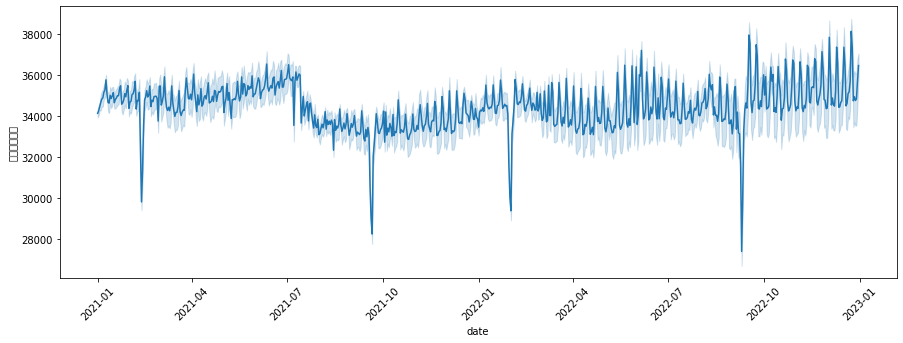

In [197]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='date', y='총생활인구수', data=ys)
plt.xticks(rotation=45)
plt.show()

In [137]:
test.columns= ['hour', 'dong', 'population', 'day', 'weekend?']

In [138]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [139]:
# 한글 깨짐 해결
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['font.family'] = 'NanumGothic'

In [140]:
test

,hour,dong,population,day,weekend?
0,0,청운효자동,14473.8890,4,0
1,0,사직동,13299.5313,4,0
2,0,부암동,15518.3772,4,0
3,0,가회동,5108.9481,4,0
4,0,숭인1동,7907.7246,4,0
...,...,...,...,...,...
7428475,23,고덕1동,26849.5654,5,1
7428476,23,상도2동,20025.0040,5,1
7428477,23,신정2동,16125.0930,5,1
7428478,23,마천1동,14964.0371,5,1


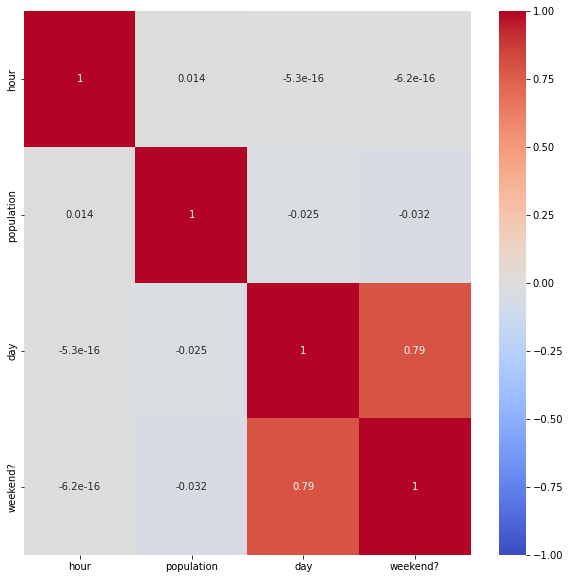

In [141]:
# 
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

In [142]:
test[test['dong'] == '역삼1동']

,hour,dong,population,day,weekend?
229,0,역삼1동,58242.1449,4,0
704,1,역삼1동,57223.2115,4,0
1040,2,역삼1동,56591.7518,4,0
1639,3,역삼1동,56388.5039,4,0
1712,4,역삼1동,56005.8818,4,0
...,...,...,...,...,...
7426368,19,역삼1동,74896.7347,5,1
7427120,20,역삼1동,73186.2084,5,1
7427368,21,역삼1동,70825.6144,5,1
7428049,22,역삼1동,67105.0900,5,1


In [143]:
# 총생활인구수 평균: 5.387226e+03
test[test['dong'] == '역삼1동']

,hour,dong,population,day,weekend?
229,0,역삼1동,58242.1449,4,0
704,1,역삼1동,57223.2115,4,0
1040,2,역삼1동,56591.7518,4,0
1639,3,역삼1동,56388.5039,4,0
1712,4,역삼1동,56005.8818,4,0
...,...,...,...,...,...
7426368,19,역삼1동,74896.7347,5,1
7427120,20,역삼1동,73186.2084,5,1
7427368,21,역삼1동,70825.6144,5,1
7428049,22,역삼1동,67105.0900,5,1


In [144]:
ga = test[test['dong'] == '역삼1동']

In [150]:
ga['population'].mean()


101091.73871215752

In [151]:
# 총생활인구수            6965.574258
ga['crowded?'] = ga['population'].apply(lambda x: 1 if ( x > ga['population'].mean()) else 0)

<ipython-input-151-497437fd60fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga['crowded?'] = ga['population'].apply(lambda x: 1 if ( x > ga['population'].mean()) else 0)


In [152]:
ga

,hour,dong,population,day,weekend?,crowded?
229,0,역삼1동,58242.1449,4,0,0
704,1,역삼1동,57223.2115,4,0,0
1040,2,역삼1동,56591.7518,4,0,0
1639,3,역삼1동,56388.5039,4,0,0
1712,4,역삼1동,56005.8818,4,0,0
...,...,...,...,...,...,...
7426368,19,역삼1동,74896.7347,5,1,0
7427120,20,역삼1동,73186.2084,5,1,0
7427368,21,역삼1동,70825.6144,5,1,0
7428049,22,역삼1동,67105.0900,5,1,0


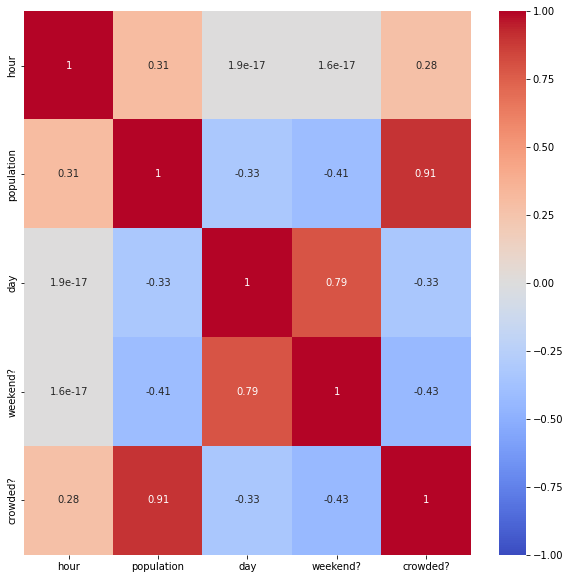

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(ga.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

In [157]:
park = test[test['dong'] == '잠실본동']
park['crowded?'] = park['population'].apply(lambda x: 1 if ( x > park['population'].mean()) else 0)
park

<ipython-input-157-700049433344>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park['crowded?'] = park['population'].apply(lambda x: 1 if ( x > park['population'].mean()) else 0)


,hour,dong,population,day,weekend?,crowded?
295,0,잠실본동,34270.1535,4,0,0
737,1,잠실본동,34274.0840,4,0,0
1073,2,잠실본동,34160.6458,4,0,0
1672,3,잠실본동,34137.0155,4,0,0
1745,4,잠실본동,34031.6283,4,0,0
...,...,...,...,...,...,...
7426361,19,잠실본동,38798.6029,5,1,1
7426943,20,잠실본동,38918.0360,5,1,1
7427385,21,잠실본동,38714.2735,5,1,1
7427795,22,잠실본동,38634.1814,5,1,1


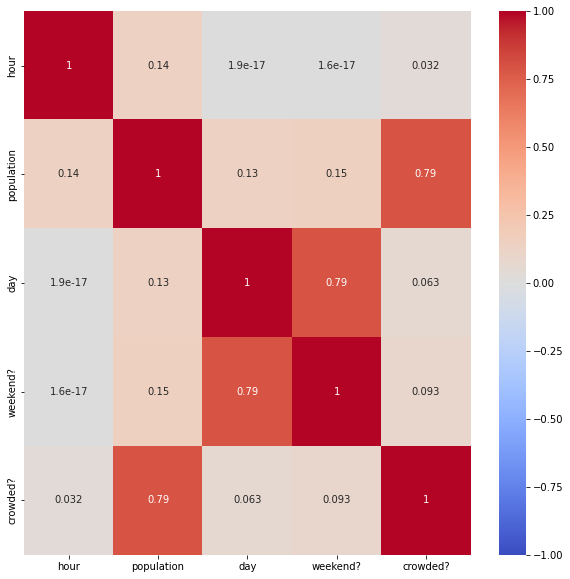

In [158]:
plt.figure(figsize=(10,10))
sns.heatmap(park.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

In [181]:
X = park.drop(['population','crowded?','dong'],axis=1)# 독립변수만 담을거임 - Rent만 제외한 컬럼(독립변수)
y = park['population'] # Rent만 저장한 컬럼(종속변수)

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state=10)


In [184]:
X_train.shape, X_test.shape


((12264, 3), (5256, 3))

In [185]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [186]:
lr.fit(X_train, y_train)


LinearRegression()

In [187]:
pred = lr.predict(X_test)


In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [189]:
mean_squared_error(y_test, pred)

4986610.9856146015

In [190]:
mean_absolute_error(y_test, pred)

1809.5945084769087

In [191]:
mean_absolute_error(y_test, pred)/park['population'].mean()

0.05248704768871775

In [178]:
X = ga.drop(['population','crowded?','dong'],axis=1)# 독립변수만 담을거임 - Rent만 제외한 컬럼(독립변수)
y = ga['population'] # Rent만 저장한 컬럼(종속변수)
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mean_absolute_error(y_test, pred)
mean_absolute_error(y_test, pred)/ga['population'].mean()


0.2906725247249727

In [204]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 229 to 7428347
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        17520 non-null  int64  
 1   dong        17520 non-null  object 
 2   population  17520 non-null  float64
 3   day         17520 non-null  int64  
 4   weekend?    17520 non-null  int64  
 5   crowded?    17520 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 958.1+ KB


In [210]:
from sklearn.tree import DecisionTreeRegressor


In [211]:
dt = DecisionTreeRegressor(random_state=10)


In [221]:
X = ga.drop(['population','crowded?','dong'],axis=1)# 독립변수만 담을거임 - Rent만 제외한 컬럼(독립변수)
y = ga['population'] # Rent만 저장한 컬럼(종속변수)

In [222]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state=10)


In [223]:
from sklearn.tree import DecisionTreeRegressor


In [224]:
dt = DecisionTreeRegressor(random_state=10)


In [225]:
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=10)

In [226]:
dt.predict(X_test)


array([153711.55326351,  67045.58253582,  70404.31390882, ...,
       153003.60828971,  74188.82867297,  68515.18642632])

In [227]:
pred_1= dt.predict(X_test) # 문제를 푼 답안지!?


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


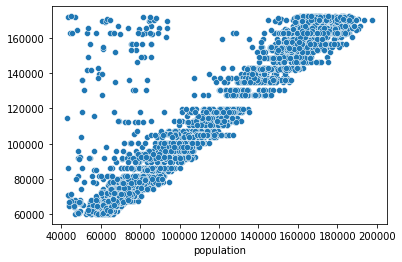

In [228]:
sns.scatterplot(y_test, pred_1) # x정답, y예측 y=x형태로 가야 좋음


In [212]:
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=10)

In [208]:
from sklearn.tree import plot_tree


In [ ]:
plt.figure(figsize=(25, 15))
plot_tree(dt, max_depth=3, fontsize=13, feature_names=X_train.columns) #내가 보고싶은 깊이 개수
plt.show()

NameError: ignored

<Figure size 1800x1080 with 0 Axes>